In [1]:
import seaborn as sns
import pandas as pd
sns.set(font_scale=1.5)
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import plotly.graph_objects as go
import plotly.express as px
from sklearn.pipeline import Pipeline


## Example Showing Linear then Squared Features

### Linear Features Only

In [2]:
#load the fuel dataset, and drop any rows that have missing data
vehicle_data = sns.load_dataset('mpg').dropna()
vehicle_data  = vehicle_data.rename(columns = {"horsepower": "hp"})
px.scatter(vehicle_data, x = "hp", y = "mpg")

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(vehicle_data[['hp']], vehicle_data['mpg'])

LinearRegression()

In [4]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=vehicle_data['hp'], y = vehicle_data['mpg'],
                         mode = "markers", name = "actual"))

x_data = np.linspace(45, 230, 100)
linear_data = model.predict(x_data.reshape(-1, 1))

fig.add_trace(go.Scatter(x=x_data, y = linear_data,
                         mode = "lines", name = ""))

fig.update_layout(font_size = 20,
                  xaxis_title = "hp",
                  yaxis_title = "mpg",
                  margin=dict(l=50, r=50, b=0, t=1),
                  yaxis_range=[7, 49],
                  showlegend = False)

fig.update_layout()

fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [5]:
mean_squared_error(model.predict(vehicle_data[['hp']]), vehicle_data['mpg'])

23.943662938603108

Fitting a parabolic model

In [6]:
x_data = np.linspace(45, 230, 100)
parabola_data = (x_data - 250)**2 / 1750 + 10

In [7]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=vehicle_data['hp'], y = vehicle_data['mpg'],
                         mode = "markers", name = ""))

fig.add_trace(go.Scatter(x=x_data, y = parabola_data,
                         mode = "lines", name = ""))

fig.update_layout(font_size = 20,
                  xaxis_title = "hp",
                  yaxis_title = "mpg",
                  margin=dict(l=50, r=50, b=0, t=1),
                  showlegend = False)
fig.show()

In [8]:
eyeballed_parabola_model_predictions = (vehicle_data["hp"] - 250)**2 / 1750 + 10

In [9]:
mean_squared_error(eyeballed_parabola_model_predictions, vehicle_data["mpg"])

21.00328151103707

### Fitting a Squared Model Using Linear Regression

In [10]:
#pretend code! SquaredRegression does not exist
#from sklearn.nonlinear_model import SquaredRegression
#model = SquaredRegression()
#model.fit(vehicle_data[['hp']], vehicle_data['mpg'])

In [11]:
vehicle_data[["hp", "mpg"]]

,hp,mpg
0,130.0,18.0
1,165.0,15.0
2,150.0,18.0
3,150.0,16.0
4,140.0,17.0
...,...,...
393,86.0,27.0
394,52.0,44.0
395,84.0,32.0
396,79.0,28.0


In [12]:
vehicle_data["hp2"] = vehicle_data["hp"]**2

In [13]:
vehicle_data[["hp", "hp2", "mpg"]]

,hp,hp2,mpg
0,130.0,16900.0,18.0
1,165.0,27225.0,15.0
2,150.0,22500.0,18.0
3,150.0,22500.0,16.0
4,140.0,19600.0,17.0
...,...,...,...
393,86.0,7396.0,27.0
394,52.0,2704.0,44.0
395,84.0,7056.0,32.0
396,79.0,6241.0,28.0


In [14]:
from sklearn.linear_model import LinearRegression
sq_model = LinearRegression()
sq_model.fit(vehicle_data[['hp', 'hp2']], vehicle_data['mpg'])

LinearRegression()

In [15]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=vehicle_data['hp'], y = vehicle_data['mpg'],
                         mode = "markers", name = ""))

synthetic_data = pd.DataFrame({'hp': np.linspace(45, 230, 100), 'hp2': np.linspace(45, 230, 100)**2})

fig.add_trace(go.Scatter(x=synthetic_data["hp"], y = sq_model.predict(synthetic_data),
                         mode = "lines", name = ""))

fig.update_layout(font_size = 20,
                  xaxis_title = "hp",
                  yaxis_title = "mpg",
                  margin=dict(l=50, r=50, b=0, t=1),
                  showlegend = False)
fig.show()

In [16]:
sq_model.coef_


array([-0.46618963,  0.00123054])

In [17]:
sq_model.intercept_


56.90009970211294

In [18]:
mean_squared_error(eyeballed_parabola_model_predictions, vehicle_data["mpg"])

21.00328151103707

In [19]:
mean_squared_error(sq_model.predict(vehicle_data[["hp", "hp2"]]), vehicle_data["mpg"])

18.98476890761722

## Using an Sklearn Pipeline to Fit Higher Order Models

### Manually Adding a Cubic Feature

Suppose we want to use the cube of the horsepower as an additional feature. One way to do this is manually:

In [20]:
vehicle_data["hp3"] = vehicle_data["hp"]**3

In [21]:
vehicle_data[["hp", "hp2", "hp3", "mpg"]]

,hp,hp2,hp3,mpg
0,130.0,16900.0,2197000.0,18.0
1,165.0,27225.0,4492125.0,15.0
2,150.0,22500.0,3375000.0,18.0
3,150.0,22500.0,3375000.0,16.0
4,140.0,19600.0,2744000.0,17.0
...,...,...,...,...
393,86.0,7396.0,636056.0,27.0
394,52.0,2704.0,140608.0,44.0
395,84.0,7056.0,592704.0,32.0
396,79.0,6241.0,493039.0,28.0


In [22]:
cu_model = LinearRegression()
cu_model.fit(vehicle_data[['hp', 'hp2', 'hp3']], vehicle_data['mpg'])

LinearRegression()

In [23]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=vehicle_data['hp'], y = vehicle_data['mpg'],
                         mode = "markers", name = ""))

synthetic_data = pd.DataFrame({'hp': np.linspace(45, 230, 100), 'hp2': np.linspace(45, 230, 100)**2, 'hp3': np.linspace(45, 230, 100)**3})

fig.add_trace(go.Scatter(x=synthetic_data["hp"], y = cu_model.predict(synthetic_data),
                         mode = "lines", name = ""))

fig.update_layout(font_size = 20,
                  xaxis_title = "hp",
                  yaxis_title = "mpg",
                  margin=dict(l=50, r=50, b=0, t=1),
                  showlegend = False)

fig.show()

In [24]:
mean_squared_error(cu_model.predict(vehicle_data[["hp", "hp2", "hp3"]]), vehicle_data["mpg"])

18.944989814485922

### Using sklearn Transforms and Pipelines to Programatically Generate Features

We can use the PolynomialFeatures transformer to create the first 3 powers of a given input, e.g. below we get the first 3 powers of 5. Note that there is also the 0th power of 5 included as a bias term.

In [25]:
from sklearn.preprocessing import PolynomialFeatures

poly_transform = PolynomialFeatures(degree = 3)
poly_transform.fit_transform([[5.0]])

array([[  1.,   5.,  25., 125.]])

We can apply a polynomial transformation to a DataFrame. For example, below we compute the polynomial transform of a one column DF containing only the hp data.

In [26]:
poly_transform = PolynomialFeatures(degree = 3)
poly_transform.fit_transform(vehicle_data[["hp"]])

array([[1.000000e+00, 1.300000e+02, 1.690000e+04, 2.197000e+06],
       [1.000000e+00, 1.650000e+02, 2.722500e+04, 4.492125e+06],
       [1.000000e+00, 1.500000e+02, 2.250000e+04, 3.375000e+06],
       ...,
       [1.000000e+00, 8.400000e+01, 7.056000e+03, 5.927040e+05],
       [1.000000e+00, 7.900000e+01, 6.241000e+03, 4.930390e+05],
       [1.000000e+00, 8.200000e+01, 6.724000e+03, 5.513680e+05]])

In [27]:
poly_transform = PolynomialFeatures(degree = 3)
pd.DataFrame(poly_transform.fit_transform(vehicle_data[["hp"]]))

,0,1,2,3
0,1.0,130.0,16900.0,2197000.0
1,1.0,165.0,27225.0,4492125.0
2,1.0,150.0,22500.0,3375000.0
3,1.0,150.0,22500.0,3375000.0
4,1.0,140.0,19600.0,2744000.0
...,...,...,...,...
387,1.0,86.0,7396.0,636056.0
388,1.0,52.0,2704.0,140608.0
389,1.0,84.0,7056.0,592704.0
390,1.0,79.0,6241.0,493039.0


If you don't want the bias term (0th power), set `include_bias` to `False`.

In [28]:
poly_transform = PolynomialFeatures(degree = 3, include_bias = False)
pd.DataFrame(poly_transform.fit_transform(vehicle_data[["hp"]]))

,0,1,2
0,130.0,16900.0,2197000.0
1,165.0,27225.0,4492125.0
2,150.0,22500.0,3375000.0
3,150.0,22500.0,3375000.0
4,140.0,19600.0,2744000.0
...,...,...,...
387,86.0,7396.0,636056.0
388,52.0,2704.0,140608.0
389,84.0,7056.0,592704.0
390,79.0,6241.0,493039.0


We can get names for our columns by using `get_feature_names_out`.

In [29]:
poly_transform.get_feature_names_out()

array(['hp', 'hp^2', 'hp^3'], dtype=object)

In [30]:
pd.DataFrame(poly_transform.fit_transform(vehicle_data[["hp"]]),
             columns = poly_transform.get_feature_names_out())

,hp,hp^2,hp^3
0,130.0,16900.0,2197000.0
1,165.0,27225.0,4492125.0
2,150.0,22500.0,3375000.0
3,150.0,22500.0,3375000.0
4,140.0,19600.0,2744000.0
...,...,...,...
387,86.0,7396.0,636056.0
388,52.0,2704.0,140608.0
389,84.0,7056.0,592704.0
390,79.0,6241.0,493039.0


## Using an SKLearn Pipeline

### Manually Creating Cubic Data then Fitting

Below we can fit a model on the 1st, 2nd, and 3rd powers of horsepower.

In [31]:
poly_transform = PolynomialFeatures(degree = 3, include_bias = False)
cu_model = LinearRegression()
vehicle_data_with_cubic_features = \
             pd.DataFrame(poly_transform.fit_transform(vehicle_data[["hp"]]),
             columns = poly_transform.get_feature_names_out())
cu_model.fit(vehicle_data_with_cubic_features, vehicle_data[["mpg"]])

LinearRegression()

After fitting our model on cubic data, we can use that model. Note that it won't work if you provide only a single number. This is because `cu_model` expects three inputs.

If we provide 3 inputs, the cubic model is able to make a prediction. This works, but it's a bit annoying because we had to manually compute the square and cube of our input.

In [34]:
cu_model.predict([[100, 10000, 1000000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([[22.44325879]])

We can also use our poly_transform to avoid having to manually compute the 1st three powers of our input like we did above.

In [35]:
cu_model.predict(poly_transform.fit_transform([[100]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([[22.44325879]])

An sklearn pipeline lets us combine the polynomial feature computation and regression model invocation into a single `fit` call. That is, we only provide the `hp` feature to our pipelined model, and it will automatically compute the first three powers before feeding that data to the `fit` method of our `LinearRegression` object.

In [36]:
from sklearn.pipeline import Pipeline
pipelined_model = Pipeline([
    ('josh_transform', PolynomialFeatures(degree = 3, include_bias = False)),
    ('josh_regression', LinearRegression())
])
pipelined_model.fit(vehicle_data[["hp"]], vehicle_data["mpg"])

Pipeline(steps=[('josh_transform',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('josh_regression', LinearRegression())])

The pipelining also works on calls to `predict`. Note that below we can pass just the number 100. The pipeline will automatically compute the first three powers before feeding that data to the `predict` method of the `LinearRegression` object.

In [37]:
pipelined_model.predict([[100]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



array([22.44325879])

We can access individual steps using `named_steps`.

In [38]:
pipelined_model.named_steps['josh_regression']

LinearRegression()

In [39]:
pipelined_model.named_steps['josh_regression'].coef_

array([-5.68850128e-01,  2.07901126e-03, -2.14662591e-06])

In [40]:
pipelined_model.named_steps['josh_regression'].predict([[100, 10000, 1000000]])

array([22.44325879])

In [41]:
pipelined_model.predict([[100]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



array([22.44325879])

## MSE vs. Polynomial Features

Below we plot the MPG vs. hp data.

In [42]:
fig = px.scatter(vehicle_data, x = "hp", y = "mpg")
fig.show()

We can write a function that gets the MSE for a model trained on the first k powers of hp.

In [43]:
def get_MSE_for_degree_k_model(k):
    pipelined_model = Pipeline([
        ('josh_transform', PolynomialFeatures(degree = k)),
        ('josh_regression', LinearRegression(fit_intercept = True))
    ])
    pipelined_model.fit(vehicle_data[["hp"]], vehicle_data["mpg"])
    return mean_squared_error(pipelined_model.predict(vehicle_data[["hp"]]), vehicle_data["mpg"])

Naturally, as we add more powers of hp, the MSE for our model gets lower and lower.

In [44]:
ks = np.array(range(0, 7))
MSEs = [get_MSE_for_degree_k_model(k) for k in ks]
MSEs_and_k = pd.DataFrame({"k": ks, "MSE": MSEs})
MSEs_and_k

,k,MSE
0,0,60.762738
1,1,23.943663
2,2,18.984769
3,3,18.944990
4,4,18.876333
5,5,18.426969
6,6,18.241505


We can plot MSE vs. the power of our model.

In [45]:
fig = px.line(MSEs_and_k, x = "k", y = "MSE")
fig.update_layout(font_size = 20,
                  xaxis_title = "Polynomial Degree (k)",
                  yaxis_title = "Mean Square Error",
                  margin=dict(l=50, r=50, b=0, t=1))
fig.show()

We can also plot the model predictions over the data to get an intuitive feeling for how k affects the model.

In [46]:
def plot_degree_k_model(vehicle_data, k):
    pipelined_model = Pipeline([
        ('josh_transform', PolynomialFeatures(degree = k)),
        ('josh_regression', LinearRegression(fit_intercept = True))
    ])
    pipelined_model.fit(vehicle_data[["hp"]], vehicle_data["mpg"])

    fig = go.Figure()

    fig.add_trace(go.Scatter(x=vehicle_data['hp'], y = vehicle_data['mpg'],
                        mode = "markers", name = ""))

    x_range = np.linspace(45, 210, 100)

    fig.add_trace(go.Scatter(x=x_range, y = pipelined_model.predict(x_range.reshape(-1, 1)),
                         mode = "lines", name = ""))

    fig.update_layout(font_size = 20,
                  xaxis_title = "hp",
                  yaxis_title = "mpg",
                  margin=dict(l=50, r=50, b=0, t=1),
                  showlegend = False)
    return fig

The degree 1 model is a straight line.

In [47]:
fig = plot_degree_k_model(vehicle_data, 1)
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



And the degree 4 model has a curve to it.

In [48]:
fig = plot_degree_k_model(vehicle_data, 4)
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



### Variance

One downside of a high degree model is that the model becomes very sensitive to the data. The more formal term for this phenemonon is that a higher order model has more variance. Let's see how changing just one point can have a big impact on a high degree model's predictions


In [49]:
np.random.seed(5)
sample50 = vehicle_data.sample(50)

In [50]:
sample50

,mpg,cylinders,displacement,hp,weight,acceleration,model_year,origin,name,hp2,hp3
215,13.0,8,318.0,150.0,3755,14.0,76,usa,dodge d100,22500.0,3375000.0
184,25.0,4,140.0,92.0,2572,14.9,76,usa,capri ii,8464.0,778688.0
302,34.5,4,105.0,70.0,2150,14.9,79,usa,plymouth horizon tc3,4900.0,343000.0
304,37.3,4,91.0,69.0,2130,14.7,79,europe,fiat strada custom,4761.0,328509.0
265,17.5,8,318.0,140.0,4080,13.7,78,usa,dodge magnum xe,19600.0,2744000.0
359,28.1,4,141.0,80.0,3230,20.4,81,europe,peugeot 505s turbo diesel,6400.0,512000.0
315,24.3,4,151.0,90.0,3003,20.1,80,usa,amc concord,8100.0,729000.0
369,34.0,4,112.0,88.0,2395,18.0,82,usa,chevrolet cavalier 2-door,7744.0,681472.0
159,14.0,8,351.0,148.0,4657,13.5,75,usa,ford ltd,21904.0,3241792.0
48,18.0,6,250.0,88.0,3139,14.5,71,usa,ford mustang,7744.0,681472.0


We plot our degree 5 model on our dataset:

In [51]:
plot_degree_k_model(sample50, 5)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



Now create a dataset where one of the data points has a higher than usual mpg for its hp.

In [52]:
sample50_with_outlier = sample50.copy()
sample50_with_outlier.iloc[10, 0] = 27

The resulting model has quite different predictions (red line) despite being trained on a dataset that is exactly the same as above with a single outlier (at 175, 26).

In [53]:
plot_degree_k_model(sample50_with_outlier, 5)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



By contrast, a degree 2 model doesn't show nearly as much variance, i.e. if we plot the models with and without the outlier, they are pretty similar.

In [54]:
plot_degree_k_model(sample50, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



In [55]:
plot_degree_k_model(sample50_with_outlier, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



### Example of Extreme Overfitting

Suppose we have exactly 4 datapoints.

In [56]:
x_values = np.array([0, 1, 2, 3])
y_values = np.array([0, 3, 2, 1])
arbitrary_data =  pd.DataFrame({
    'x': x_values,
    'y': y_values,
})
arbitrary_data

,x,y
0,0,0
1,1,3
2,2,2
3,3,1


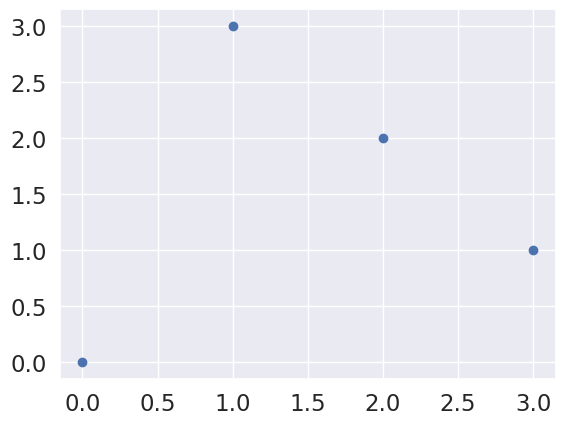

In [57]:
plt.scatter(x_values, y_values)

If we fit a degree 3 model including a bias term, we can fit a model with 100% accuracy.

In [58]:
model = Pipeline([
    ('josh_transform', PolynomialFeatures(degree=3)),
    ('josh_regression', LinearRegression(fit_intercept=False)),
])
model.fit(arbitrary_data[['x']], arbitrary_data['y']);

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



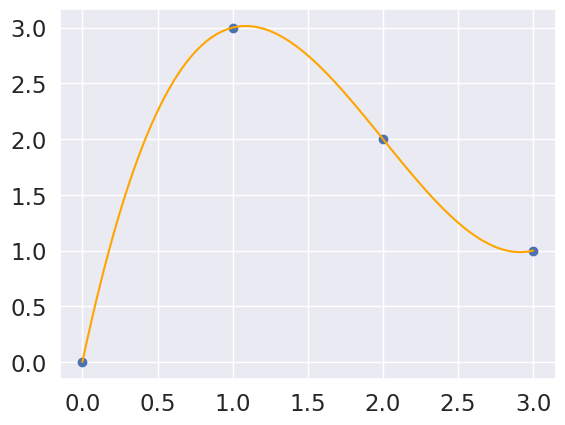

In [59]:
x_from_0_to_3 = np.linspace(0, 3, 100).reshape(-1, 1)
predicted_y = model.predict(x_from_0_to_3)
plt.scatter(x_values, y_values)
plt.plot(x_from_0_to_3, predicted_y, 'orange')

Or we could have solved this using some linear algebra (see slides and video for more details). Note that the bias term appears last rather than first when we use the linear algebra code below (because of the order in which I stuck the values of Phi and Y_hat).

In [61]:
Phi = np.array([[0,0,0,1], [1,1,1,1], [2,4,8,1], [3,9,27,1]])
Y_hat = np.array([0,3,2,1])
np.linalg.solve(Phi, Y_hat)

array([ 6.33333333, -4.        ,  0.66666667,  0.        ])

In [62]:
Phi_inverse = np.linalg.inv(Phi)
theta = Phi_inverse @ Y_hat
theta

array([ 6.33333333, -4.        ,  0.66666667,  0.        ])

The point here is that this is an example of extreme overfitting. Our model has basically just memorized the data.